In [1]:
time = pd.read_csv('../data/vets_SOF.csv', encoding = 'ISO-8859-1')

In [189]:
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_rows', 900)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib as mpl
from matplotlib import rcParams

In [9]:
time['Created'] = time['CreatedDate'].str.split().apply(lambda x: x[0])

In [11]:
time['Created'] = pd.to_datetime(time['Created'])

In [31]:
officers = time[(time['Tribe'] == 'Pilot')|(time['Tribe'] == 'Helo Pilot')|(time['Military_specialty_in_real_words'].str.contains('officer'))|(time['Military_specialty_in_real_words'].str.contains('Officer'))|(time['Undergrad_School'].str.contains('Academy'))]

In [57]:
time.insert(15, 'Officer', time.index.isin(officers.index))

In [63]:
time['Approx_Age'] = np.where(time['Officer'] == True, time['Years_of_Service'] + 22, time['Years_of_Service'] + 19)

In [201]:
time['Approx_Age'].dropna().value_counts()

27.0    49
31.0    46
32.0    45
42.0    45
28.0    41
25.0    39
30.0    34
33.0    32
29.0    28
34.0    27
39.0    25
26.0    24
43.0    21
24.0    20
38.0    15
44.0    15
40.0    14
49.0    14
35.0    13
46.0    13
41.0    12
45.0    12
48.0    12
23.0    11
37.0    10
47.0    10
36.0     9
31.5     8
28.5     6
52.0     5
23.5     5
26.5     4
50.0     3
29.5     3
32.5     3
25.5     3
41.5     3
27.5     3
30.5     3
54.0     3
37.5     2
38.5     2
22.0     2
24.5     2
36.5     1
48.5     1
30.8     1
26.6     1
49.3     1
58.0     1
47.5     1
51.0     1
50.5     1
49.5     1
39.5     1
57.0     1
53.0     1
43.5     1
22.1     1
22.5     1
56.0     1
55.0     1
38.1     1
Name: Approx_Age, dtype: int64

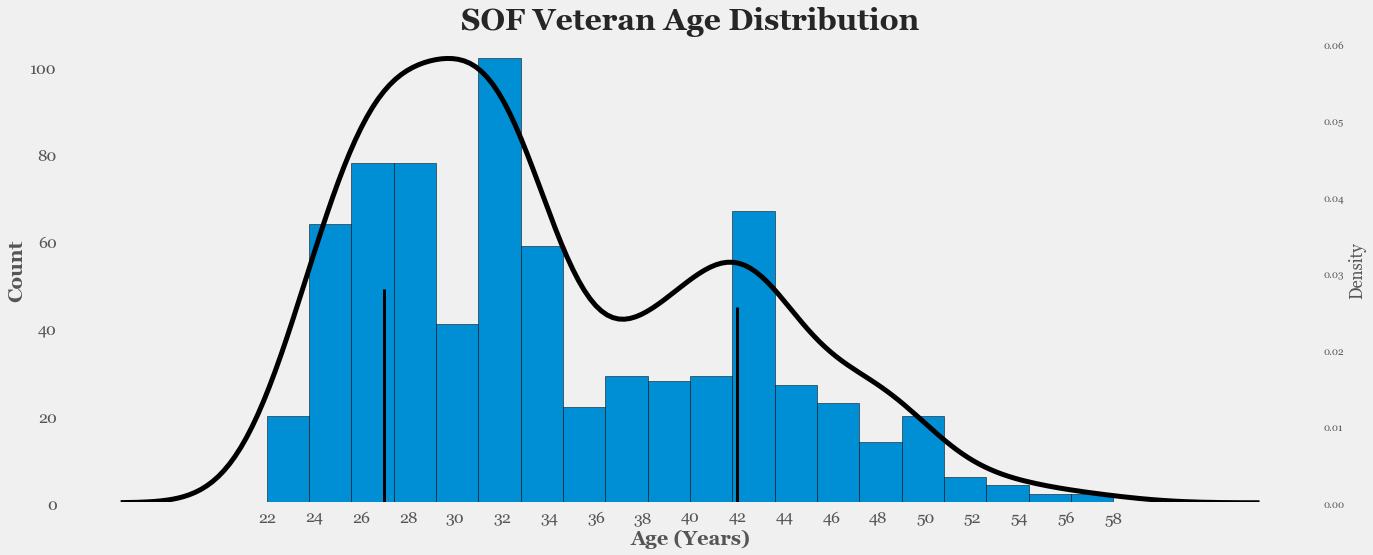

In [216]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx()
title = plt.title('SOF Veteran Age Distribution', fontweight='bold', fontsize=30)

data = time['Approx_Age'].dropna().value_counts()
x = data.index
y = data.values

#plot 1 - Histogram
plot1 = ax1.hist(time['Approx_Age'], align='mid', edgecolor='black', bins=20)
ax1.grid(False)
ticks = ax1.set_xticks(range(22,60,2))
params = ax1.tick_params(axis='both', labelsize=16)

#plot 2 - KDE
plot2 = sns.kdeplot(time['Approx_Age'], ax=ax2, color='black', lw=5)
ax2.grid(False)
xlabel = ax1.set_xlabel('Age (Years)', fontweight='bold', fontsize=20)
ylabel = ax1.set_ylabel('Count', fontweight='bold', fontsize=20)
lines=ax1.vlines([27, 42], ymin=[0,0], ymax=[49,45], lw=3, color='black')

In [ ]:
# Create storage object with filename `processed_data`
data_store = pd.HDFStore('processed_data.h5')

# Put DataFrame into the object setting the key as 'preprocessed_df'
data_store['preprocessed_df'] = df
data_store.close()

# Access data store
data_store = pd.HDFStore('processed_data.h5')

# Retrieve data using key
preprocessed_df = data_store['preprocessed_df']
data_store.close()

In [218]:
pwd

'/Users/americanthinker/Galvanize/Assignments/Capstone_Project_I/notebooks'

In [168]:
tribe_counts = time['Tribe'].value_counts()

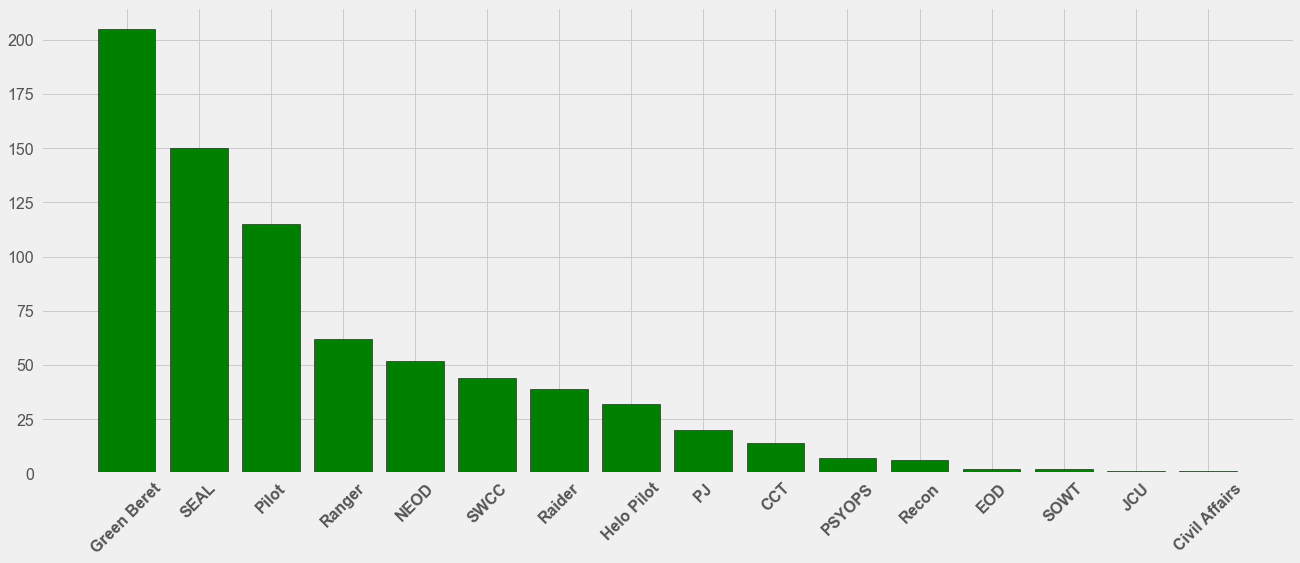

In [179]:
fig = plt.figure(figsize=(20,8))
plot = plt.bar(tribe_counts.index, tribe_counts.values, color='green', edgecolor='black')
ticks = plt.xticks(fontsize=16, rotation=45, fontweight='bold')
yticks = plt.yticks(fontsize=16)
#label = plt.xlabel(fontsize=16)

In [177]:
branch_counts = time['Branch'].value_counts()

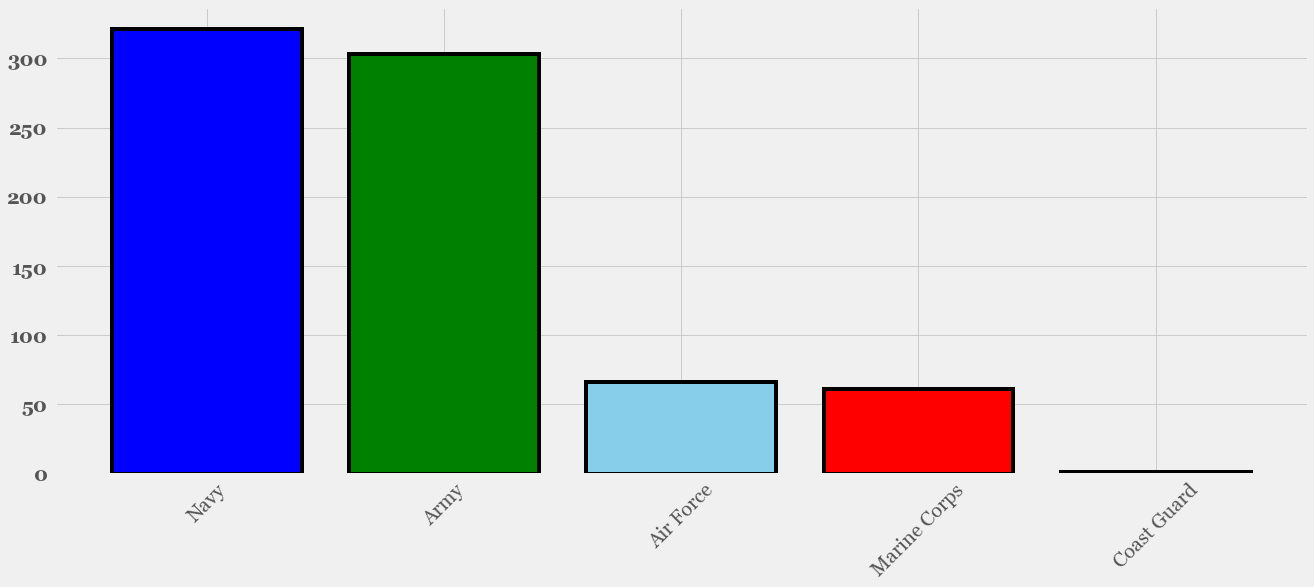

In [242]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']
fig = plt.figure(figsize=(20,8))
plot = plt.bar(branch_counts.index, branch_counts.values, color=['blue', 'green', 'skyblue', 'red'], edgecolor='black', lw=4)
ticks = plt.xticks(fontsize=20, rotation=45)
yticks = plt.yticks(fontsize=20, fontweight='bold')
#label = plt.xlabel(fontsize=16)

In [219]:
import squarify as sq

<AxesSubplot:>

(0.0, 100.0, 0.0, 100.0)

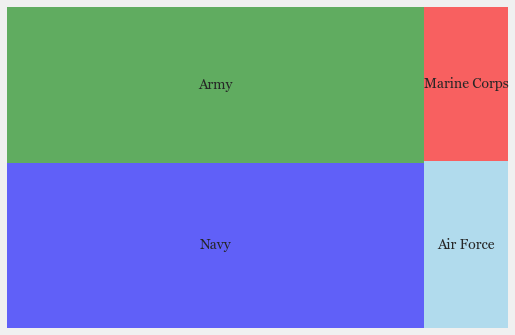

In [230]:
sizes=branch_counts.values[:-1]
label=branch_counts.index[:-1]
color=['blue','green','skyblue', 'red']
sq.plot(sizes=sizes, label=label, color=color, alpha=0.6, text_kwargs={'fontsize':14})
plt.axis('off')
plt.show()

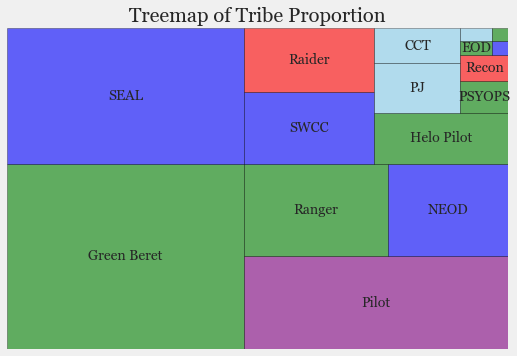

In [244]:
sizes=tribe_counts.values
label=tribe_counts.index[:13]
colors=['green', 'blue', 'purple', 'green', 'blue', 'blue', 'red', 'green', 'skyblue', 'skyblue', 'green', 'red', 'green', 'skyblue', 'blue', 'green']
plot = sq.plot(sizes=sizes, label=label, color=colors, alpha=0.6, edgecolor='black')
grid = plt.axis('off')
title = plt.title('Treemap of Tribe Proportion')

<AxesSubplot:>

<AxesSubplot:>

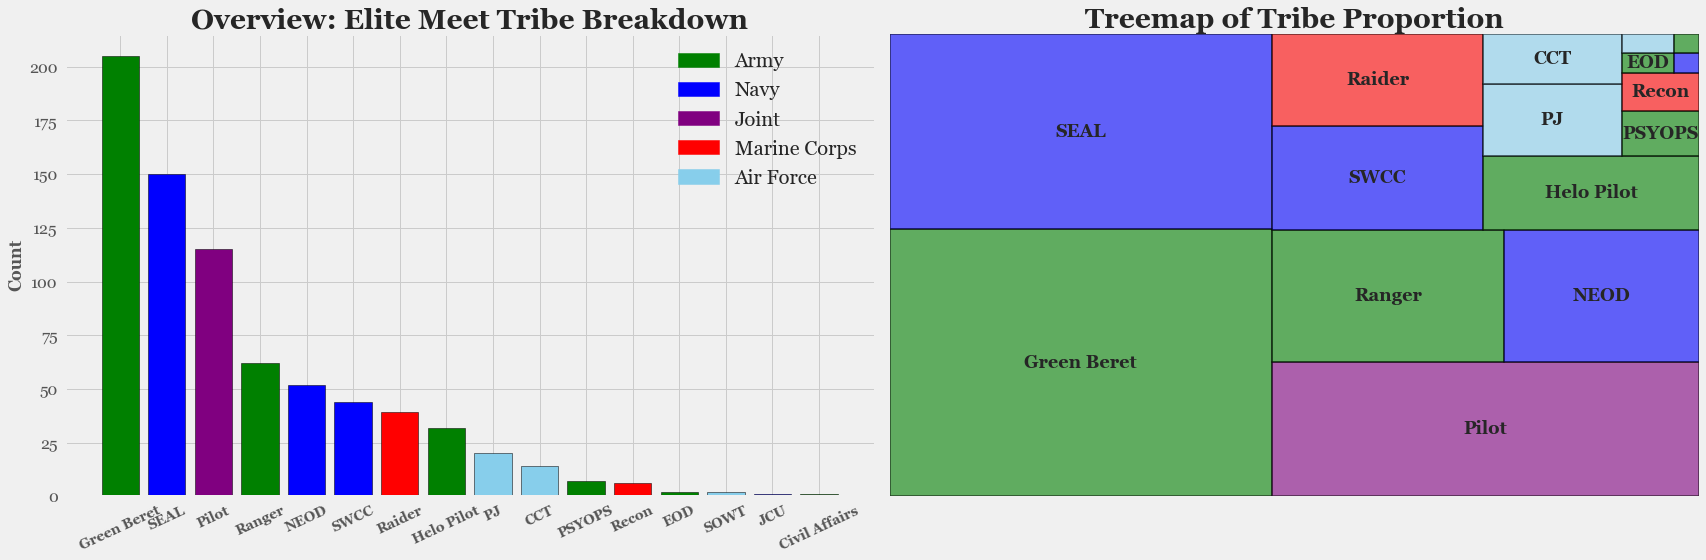

In [272]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(24,8))
colors=['green', 'blue', 'purple', 'green', 'blue', 'blue', 'red', 'green', 'skyblue', 'skyblue', 'green', 'red', 'green', 'skyblue', 'blue', 'green']

plt.subplot(1,2,1)
plot = plt.bar(tribe_counts.index, tribe_counts.values, color=colors, edgecolor='black')
ticks = plt.xticks(fontsize=14, rotation=25,fontweight='bold')
yticks = plt.yticks(fontsize=16)
ptitle = plt.title('Overview: Elite Meet Tribe Breakdown', fontweight='bold', fontsize=28)
ylabel = plt.ylabel('Count', fontweight='bold')
green_patch = mpatches.Patch(color='green', label='Army')
red_patch = mpatches.Patch(color='red', label='Marine Corps')
blue_patch = mpatches.Patch(color='blue', label='Navy')
ppl_patch = mpatches.Patch(color='purple', label='Joint')
skyblue_patch = mpatches.Patch(color='skyblue', label='Air Force')

plt.legend(handles=[green_patch, blue_patch, ppl_patch, red_patch, skyblue_patch], fontsize='x-large')

plt.subplot(1,2,2)
sizes=tribe_counts.values
label=tribe_counts.index[:13]
plot = sq.plot(sizes=sizes, label=label, color=colors, text_kwargs={'fontsize':18, 'fontweight':'bold'}, alpha=0.6, lw=1.5, edgecolor='black')
grid = plt.axis('off')
title = plt.title('Treemap of Tribe Proportion', fontsize=28, fontweight='bold')
plt.tight_layout()